In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets as widgets
import calendar
import math
import plotly.graph_objects as go

In [2]:
df = pd.read_excel('CoffeeShopSales.xlsx')

In [3]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [4]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [6]:
df.store_id.unique()

array([5, 8, 3])

In [7]:
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [8]:
df.product_id.unique()

array([32, 57, 59, 22, 77, 28, 39, 58, 56, 33, 51, 87, 47, 79, 42, 61, 69,
       40, 43, 76, 45, 71, 38, 26, 27, 29, 54, 55, 24, 60, 78, 44, 48, 23,
       46, 25, 34, 36, 74, 53, 41, 37, 50, 72, 35, 70, 73, 75, 31, 49, 52,
       30, 64, 12, 63,  6,  9, 65, 84, 19,  7,  1, 17, 10,  4, 15, 16,  3,
       20, 83, 18, 21, 13, 11,  5,  2, 81, 14,  8, 82])

In [9]:
df.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [10]:
df.product_type.unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [11]:
df['total_amount'] = df['transaction_qty'] * df['unit_price']

## Key Performance Metrics

In [12]:
total_transactions = df['transaction_id'].nunique()
print(f'Total Transactions: {total_transactions}')

Total Transactions: 149116


In [13]:
total_revenue = df['total_amount'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $698812.33


In [14]:
average_items_per_transaction = df['transaction_qty'].mean()
print(f'Average Items per Transaction: {average_items_per_transaction:.2f}')

Average Items per Transaction: 1.44


In [15]:
average_transaction_value = total_revenue/total_transactions
print(f'Average Transaction Value: ${average_transaction_value:.2f}')

Average Transaction Value: $4.69


## 1. Sales Trends Over Time

* Daily, Weekly, and Monthly Sales Trends
* Identify Peak Sales Periods and Slow Times

transaction_date
2023-01    17314
2023-02    16359
2023-03    21229
2023-04    25335
2023-05    33527
2023-06    35352
Freq: M, Name: transaction_id, dtype: int64

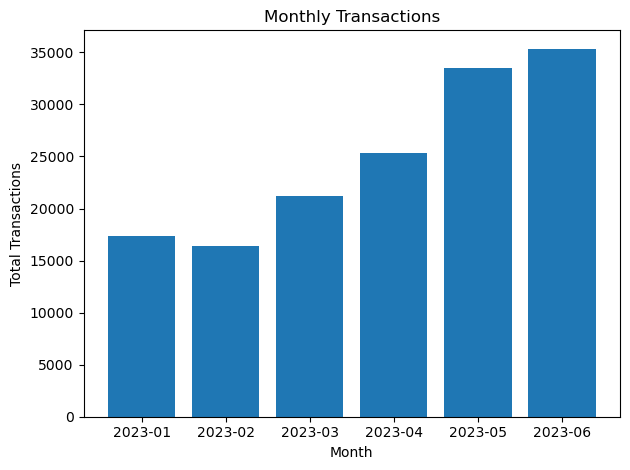

In [16]:
monthly_transactions = df.groupby(df['transaction_date'].dt.to_period('M'))['transaction_id'].nunique()
display(monthly_transactions)

plt.bar(monthly_transactions.index.astype(str), monthly_transactions.values)
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Monthly Transactions')
plt.tight_layout()
plt.show()

transaction_date
2023-01     81677.74
2023-02     76145.19
2023-03     98834.68
2023-04    118941.08
2023-05    156727.76
2023-06    166485.88
Freq: M, Name: total_amount, dtype: float64

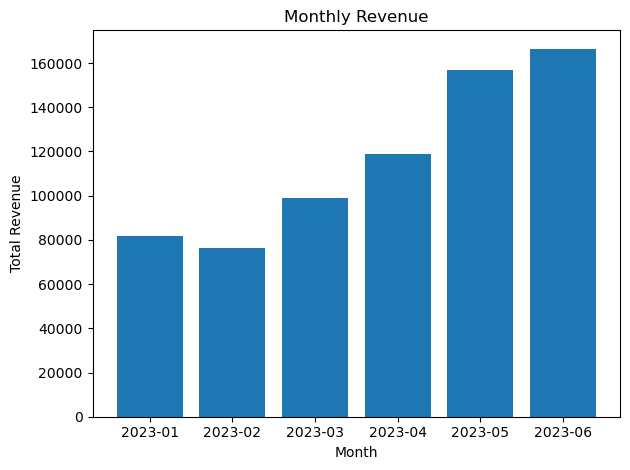

In [17]:
monthly_revenue = df.groupby(df['transaction_date'].dt.to_period('M'))['total_amount'].sum()
display(monthly_revenue)
plt.bar(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.tight_layout()
plt.show()

transaction_date
2023-01    4.717439
2023-02    4.654636
2023-03    4.655645
2023-04    4.694734
2023-05    4.674673
2023-06    4.709377
Freq: M, dtype: float64

Text(0, 0.5, 'Average Transaction Value')

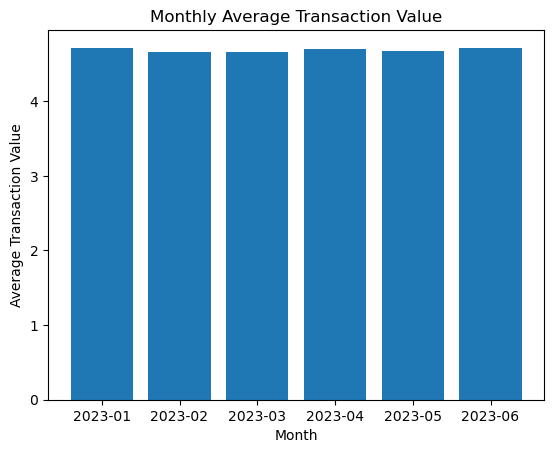

In [18]:
monthly_average_transaction_value = monthly_revenue / monthly_transactions
display(monthly_average_transaction_value)

plt.bar(monthly_average_transaction_value.index.astype(str), monthly_average_transaction_value.values)
plt.title('Monthly Average Transaction Value')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')

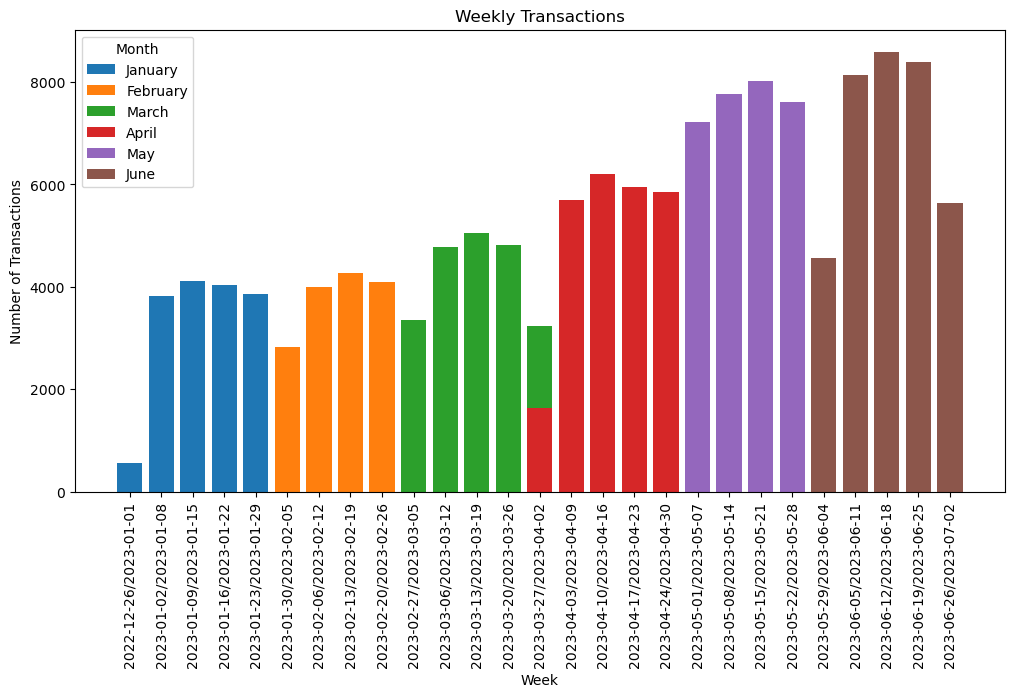

In [19]:
month = df.transaction_date.dt.month.unique().tolist()

plt.figure(figsize=(12, 6))
for week in month:

    weekly_transaction = df[df.transaction_date.dt.month == week]

    weekly_transaction = weekly_transaction.groupby(
        weekly_transaction.transaction_date.dt.to_period('W')
    ).size()

    plt.bar(
        weekly_transaction.index.astype(str),
        height=weekly_transaction
)

plt.xticks(rotation=90)
plt.title('Weekly Transactions')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.legend(df.transaction_date.dt.strftime('%B').unique().tolist(), title='Month')

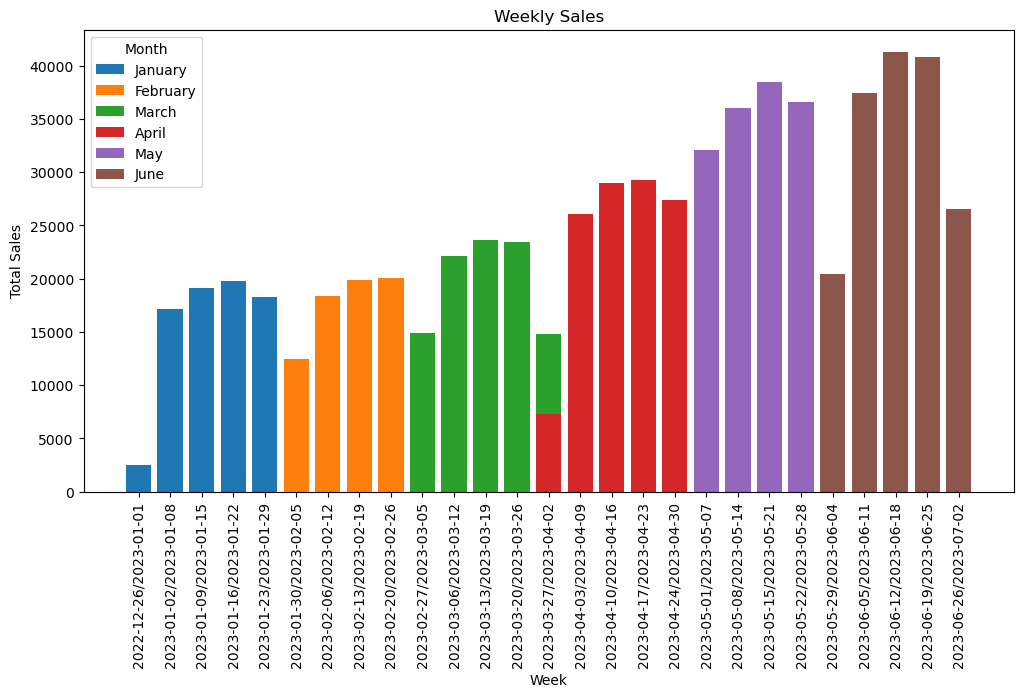

In [20]:
month = df.transaction_date.dt.month.unique().tolist()

plt.figure(figsize=(12, 6))
for week in month:

    weekly_transaction = df[df.transaction_date.dt.month == week]

    weekly_transaction = weekly_transaction.groupby(
        weekly_transaction.transaction_date.dt.to_period('W')
    )['total_amount'].sum()

    plt.bar(
        weekly_transaction.index.astype(str),
        height=weekly_transaction
)

plt.xticks(rotation=90)
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend(df.transaction_date.dt.strftime('%B').unique().tolist(), title='Month')

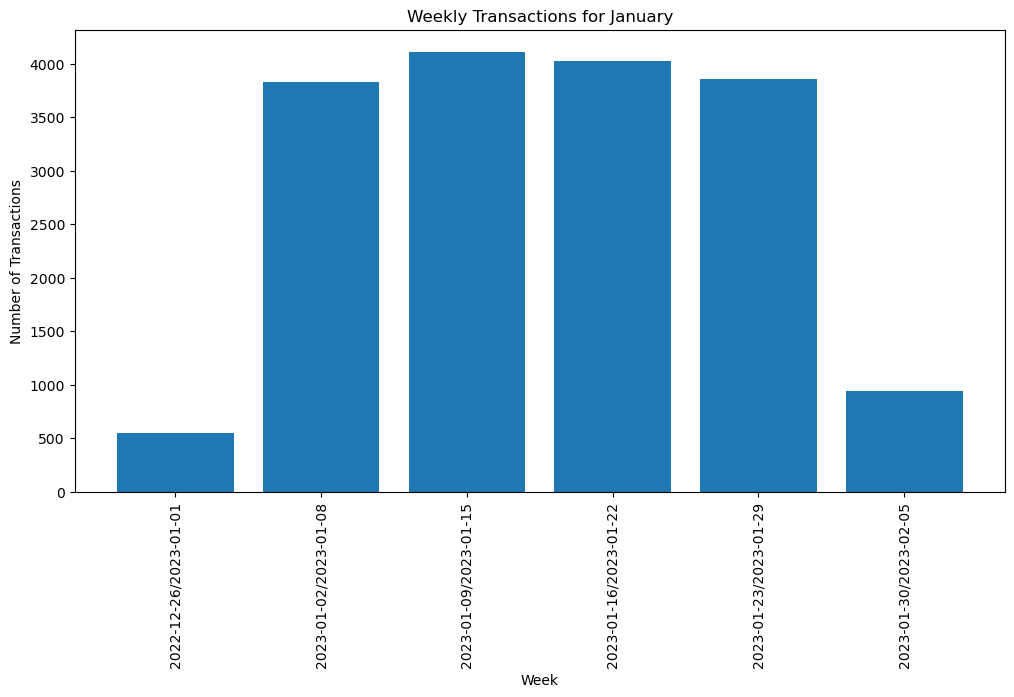

In [48]:
# Create a dropdown for Month selection
month_names = df['transaction_date'].dt.strftime('%B').unique().tolist()
month_dropdown = widgets.Dropdown(
    options = month_names,
    description = 'Month:',
    value = month_names[0]
)

def week_transactions(selected_month):
    # Filter the DataFrame for the selected month
    filtered_df = df[df['transaction_date'].dt.strftime('%B') == selected_month]
    
    # Group by week and count transactions
    weekly_transactions = filtered_df.groupby(
        filtered_df['transaction_date'].dt.to_period('W')
    ).size()
    
    # Plot the weekly sales
    plt.figure(figsize=(12, 6))
    plt.bar(weekly_transactions.index.astype(str), height=weekly_transactions)
    plt.title(f'Weekly Transactions for {selected_month}')
    plt.xlabel('Week')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=90)
    plt.show()
    
# widgets.interact(
#     week_transactions, 
#     selected_month=month_dropdown
# )

week_transactions('January')

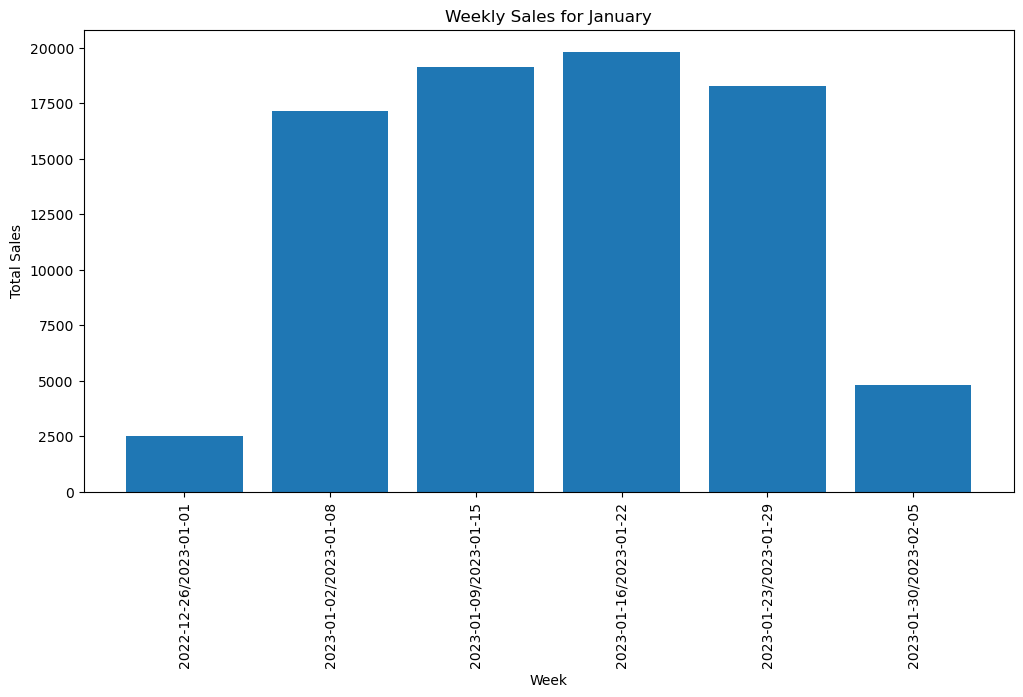

In [49]:
# Create a dropdown for Month selection
month_names = df['transaction_date'].dt.strftime('%B').unique().tolist()
month_dropdown = widgets.Dropdown(
    options = month_names,
    description = 'Month:',
    value = month_names[0]
)

def week_sales(selected_month):
    # Filter the DataFrame for the selected month
    filtered_df = df[df['transaction_date'].dt.strftime('%B') == selected_month]
    
    # Group by week and count transactions
    weekly_sales = filtered_df.groupby(
        filtered_df['transaction_date'].dt.to_period('W')
    )['total_amount'].sum()
    
    # Plot the weekly sales
    plt.figure(figsize=(12, 6))
    plt.bar(weekly_sales.index.astype(str), height=weekly_sales)
    plt.title(f'Weekly Sales for {selected_month}')
    plt.xlabel('Week')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.show()
    
# widgets.interact(
#     week_sales, 
#     selected_month=month_dropdown
# )

week_sales('January')

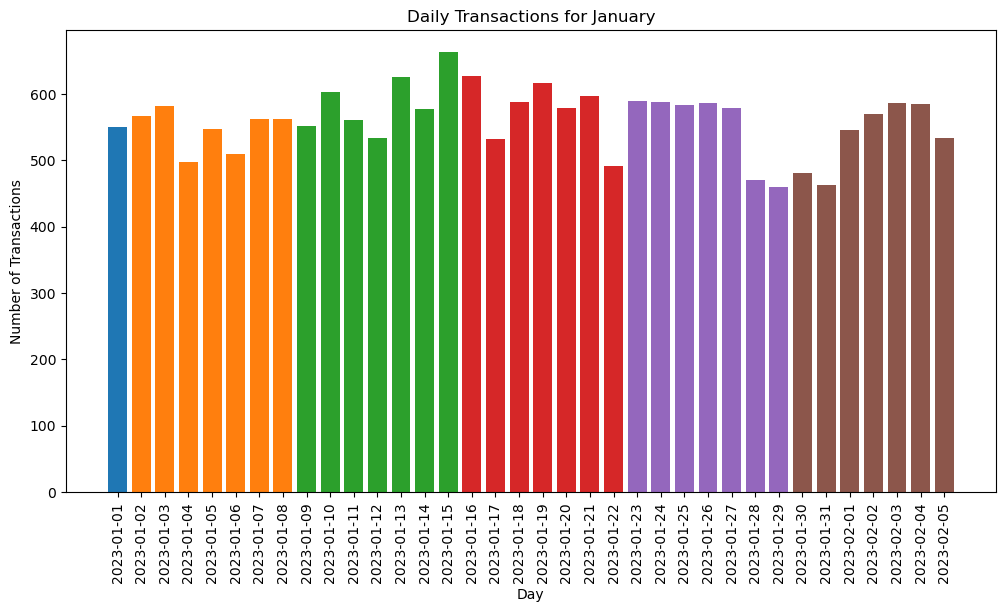

In [51]:
# Create a dropdown for Month selection
month_names = df['transaction_date'].dt.strftime('%B').unique().tolist()
month_dropdown = widgets.Dropdown(
    options = month_names,
    description = 'Month:',
    value = month_names[0]
)

def daily_transactions(selected_month):
    transactions_for_January = df[df['transaction_date'].dt.strftime('%B') == selected_month]
    transactions_for_January = transactions_for_January['week'].astype(str).unique().tolist()

    plt.figure(figsize=(12, 6))
    for week in transactions_for_January:
        weekly_transactions = df[df['week'].astype(str) == week]

        daily_transactions = weekly_transactions.groupby(
            weekly_transactions['transaction_date'].dt.to_period('D')
        ).size()

        plt.bar(
            daily_transactions.index.astype(str),
            height=daily_transactions
        )

    plt.xticks(rotation=90)
    plt.title(f'Daily Transactions for {selected_month}')
    plt.xlabel('Day')
    plt.ylabel('Number of Transactions')
    
# widgets.interact(
#     daily_transactions, 
#     selected_month=month_dropdown
# )

daily_transactions('January')

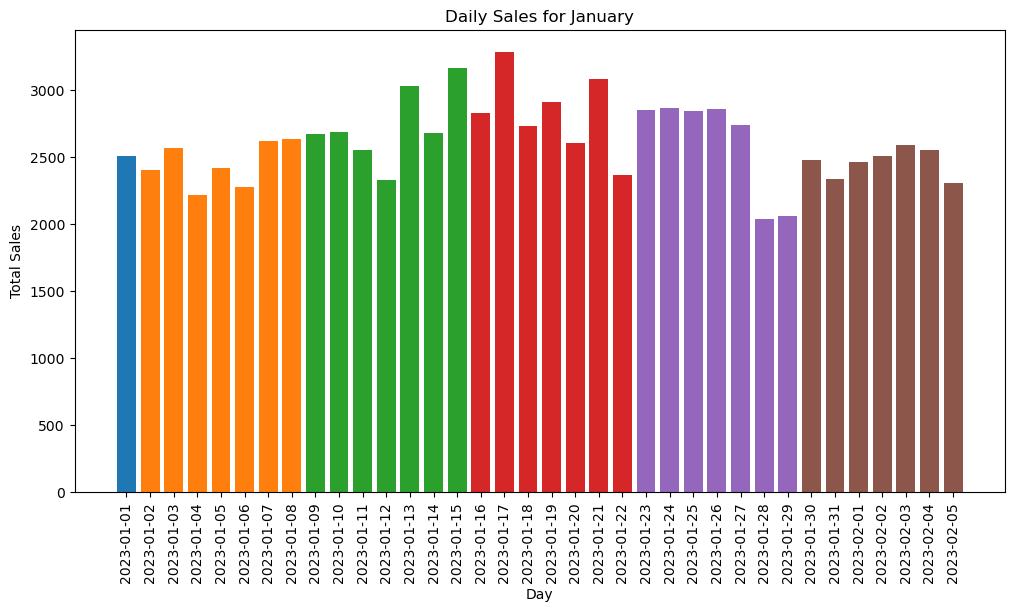

In [52]:
# Create a dropdown for Month selection
month_names = df['transaction_date'].dt.strftime('%B').unique().tolist()
month_dropdown = widgets.Dropdown(
    options = month_names,
    description = 'Month:',
    value = month_names[0]
)

def daily_sales(selected_month):
    transactions_for_January = df[df['transaction_date'].dt.strftime('%B') == selected_month]
    transactions_for_January = transactions_for_January['week'].astype(str).unique().tolist()

    plt.figure(figsize=(12, 6))
    for week in transactions_for_January:
        weekly_transactions = df[df['week'].astype(str) == week]
        daily_transactions = weekly_transactions.groupby(
            weekly_transactions['transaction_date'].dt.to_period('D')
        )['total_amount'].sum()

        plt.bar(
            daily_transactions.index.astype(str),
            height=daily_transactions
        )

    plt.xticks(rotation=90)
    plt.title(f'Daily Sales for {selected_month}')
    plt.xlabel('Day')
    plt.ylabel('Total Sales')
    
# widgets.interact(
#     daily_sales, 
#     selected_month=month_dropdown
# )

daily_sales('January')

In [25]:
df['week'] = df['transaction_date'].dt.to_period('W')

# Dropdown for month selection
month_names = df['transaction_date'].dt.strftime('%B').unique().tolist()
month_dropdown = widgets.Dropdown(
    options=month_names,
    description='Month:',
    value=month_names[0]
)

# Dropdown for week selection (dynamically updated)
def get_weeks(selected_month):
    return df[df['transaction_date'].dt.strftime('%B') == selected_month]['week'].astype(str).unique().tolist()

week_dropdown = widgets.Dropdown(
    options=get_weeks(month_dropdown.value),
    description='Week:'
)

def update_week_options(*args):
    week_dropdown.options = get_weeks(month_dropdown.value)
    if week_dropdown.options:
        week_dropdown.value = week_dropdown.options[0]
        
month_dropdown.observe(update_week_options, 'value')

def daily_sales(selected_month, selected_week):
    filtered_df = df[(df['transaction_date'].dt.strftime('%B') == selected_month) & (df['week'].astype(str) == selected_week)]
    daily_sales = filtered_df.groupby(filtered_df['transaction_date'].dt.date).size()

    plt.bar(
        daily_sales.index.astype(str),
        height=daily_sales
    )

    plt.title(f'Daily Sales for {selected_month} - {selected_week}')
    plt.xlabel('Day')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=90)
    
widgets.interact(
    daily_sales,
    selected_month=month_dropdown,
    selected_week=week_dropdown
)

interactive(children=(Dropdown(description='Month:', options=('January', 'February', 'March', 'April', 'May', …

<function __main__.daily_sales(selected_month, selected_week)>

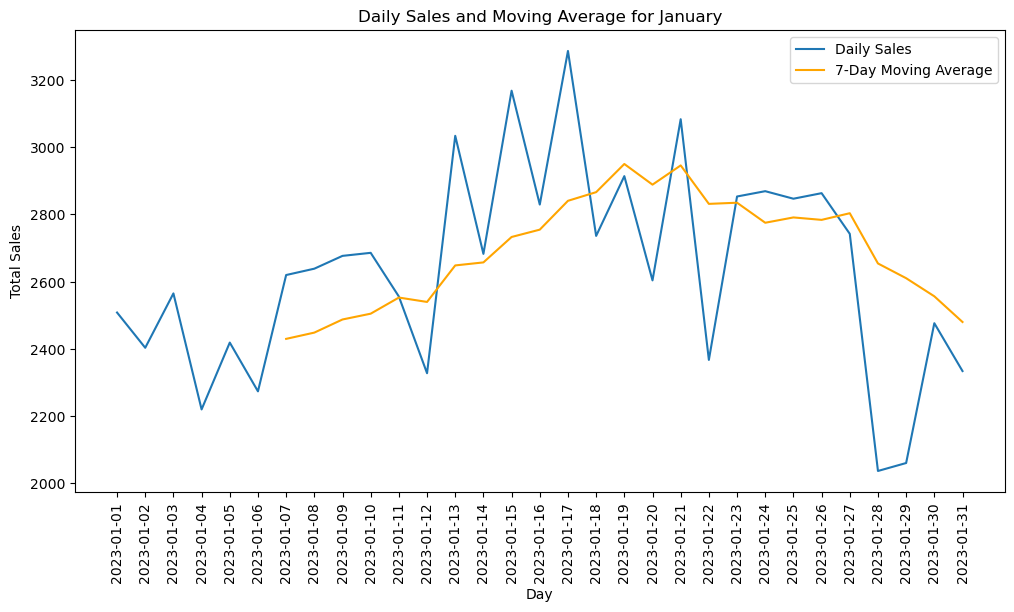

In [53]:
# Moving Average
def plot_moving_average(selected_month, window_size=7):
    transactions_for_month = df[df['transaction_date'].dt.strftime('%B') == selected_month]
    daily_sales = transactions_for_month.groupby(
        transactions_for_month['transaction_date'].dt.to_period('D')
    )['total_amount'].sum()

    # Calculate the moving average
    moving_average = daily_sales.rolling(window=window_size).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales.index.astype(str), daily_sales, label='Daily Sales')
    plt.plot(moving_average.index.astype(str), moving_average, label='7-Day Moving Average', color='orange')
    plt.xticks(rotation=90)
    plt.title(f'Daily Sales and Moving Average for {selected_month}')
    plt.xlabel('Day')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()
    
# widgets.interact(
#     plot_moving_average,
#     selected_month=month_dropdown
# )

plot_moving_average('January')

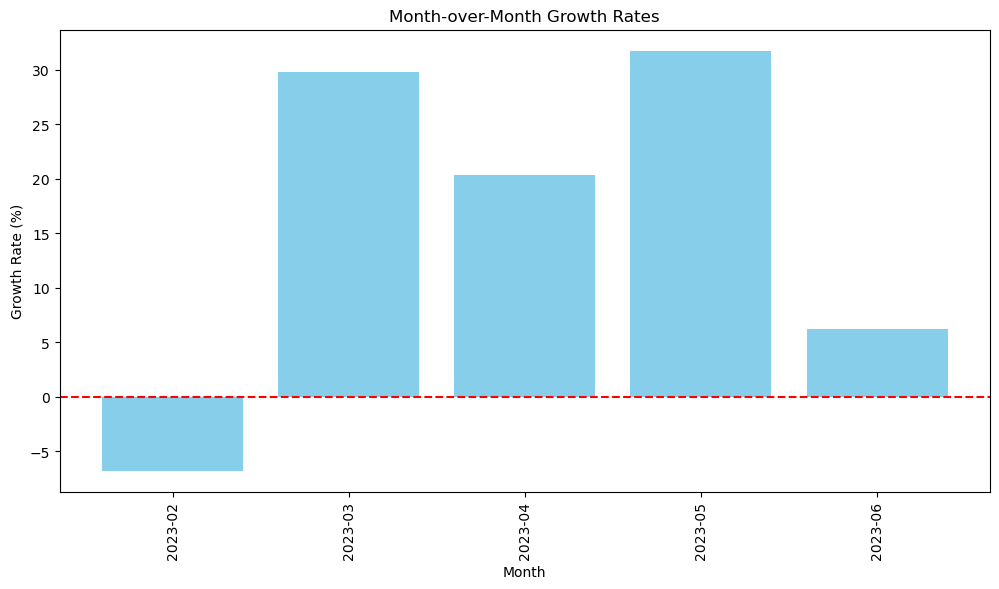

In [27]:
# Month-over-Month growth rates
def plot_mom_growth_rates():
    monthly_sales = df.groupby(df['transaction_date'].dt.to_period('M'))['total_amount'].sum()
    mom_growth = monthly_sales.pct_change() * 100

    plt.figure(figsize=(12, 6))
    plt.bar(mom_growth.index.astype(str), mom_growth, color='skyblue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Month-over-Month Growth Rates')
    plt.xlabel('Month')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=90)
    plt.show()
    
plot_mom_growth_rates()

## 2. Time of Day Analysis

In [28]:
df['weekday'] = df['transaction_date'].dt.day_name()

weekday
Monday       3910.664615
Tuesday      3825.228462
Wednesday    3858.213077
Thursday     3875.683846
Friday       3898.961538
Saturday     3875.779200
Sunday       3781.935000
Name: total_amount, dtype: float64

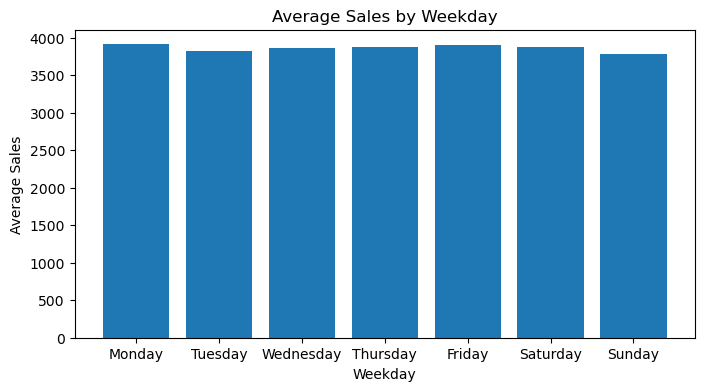

In [29]:
daywisesales = df.groupby([df['transaction_date'].dt.date, 'weekday'])['total_amount'].sum().reset_index()
average_daywisesales = daywisesales.groupby('weekday')['total_amount'].mean()

weekday_order = list(calendar.day_name)
average_daywisesales = average_daywisesales.reindex(weekday_order)
display(average_daywisesales)

plt.figure(figsize=(8, 4))
plt.bar(average_daywisesales.index, average_daywisesales.values)
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.title("Average Sales by Weekday")
plt.show()

In [30]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time
df['transaction_time']

0         07:06:11
1         07:08:56
2         07:14:04
3         07:20:24
4         07:22:41
            ...   
149111    20:18:41
149112    20:25:10
149113    20:31:34
149114    20:57:19
149115    20:57:19
Name: transaction_time, Length: 149116, dtype: object

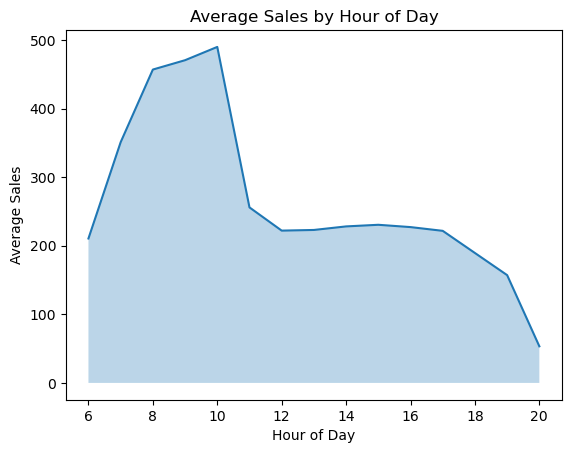

In [31]:
df['transaction_hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

hourly_sales = df.groupby([df['transaction_date'].dt.date, 'transaction_hour'])['total_amount'].sum().reset_index()

average_hourly_sales = hourly_sales.groupby('transaction_hour')['total_amount'].mean()

plt.plot(average_hourly_sales.index, average_hourly_sales.values)
plt.fill_between(average_hourly_sales.index, average_hourly_sales.values, alpha=0.3)
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales')
plt.title('Average Sales by Hour of Day')
plt.show()

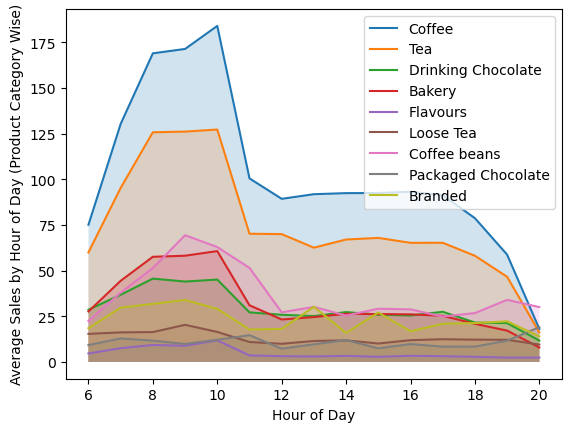

In [32]:
for category in df['product_category'].unique():
    cat_df = df[df['product_category'] == category]
    hourly_sales = cat_df.groupby([cat_df['transaction_date'].dt.date, 'transaction_hour'])['total_amount'].sum().reset_index()
    average_hourly_sales = hourly_sales.groupby('transaction_hour')['total_amount'].mean()
    plt.plot(average_hourly_sales.index, average_hourly_sales.values, label = category)
    plt.fill_between(average_hourly_sales.index, average_hourly_sales.values, alpha=0.2)

plt.xlabel("Hour of Day")
plt.ylabel("Average Sales by Hour of Day (Product Category Wise)")
plt.legend(title="Product Cateog")
plt.legend()

## 3. Store Performance

product_category    product_type         
Bakery              Scone                    3506
                    Pastry                   2409
                    Biscotti                 1975
Branded             Housewares                263
                    Clothing                   86
Coffee              Barista Espresso         5320
                    Gourmet brewed coffee    5217
                    Premium brewed coffee    2617
                    Organic brewed coffee    2575
                    Drip coffee              2475
Coffee beans        Organic Beans             162
                    Gourmet Beans             116
                    Premium Beans              93
                    Espresso Beans             77
                    House blend Beans          48
                    Green beans                35
Drinking Chocolate  Hot chocolate            3405
Flavours            Regular syrup            2100
                    Sugar free syrup          830
Loose Te

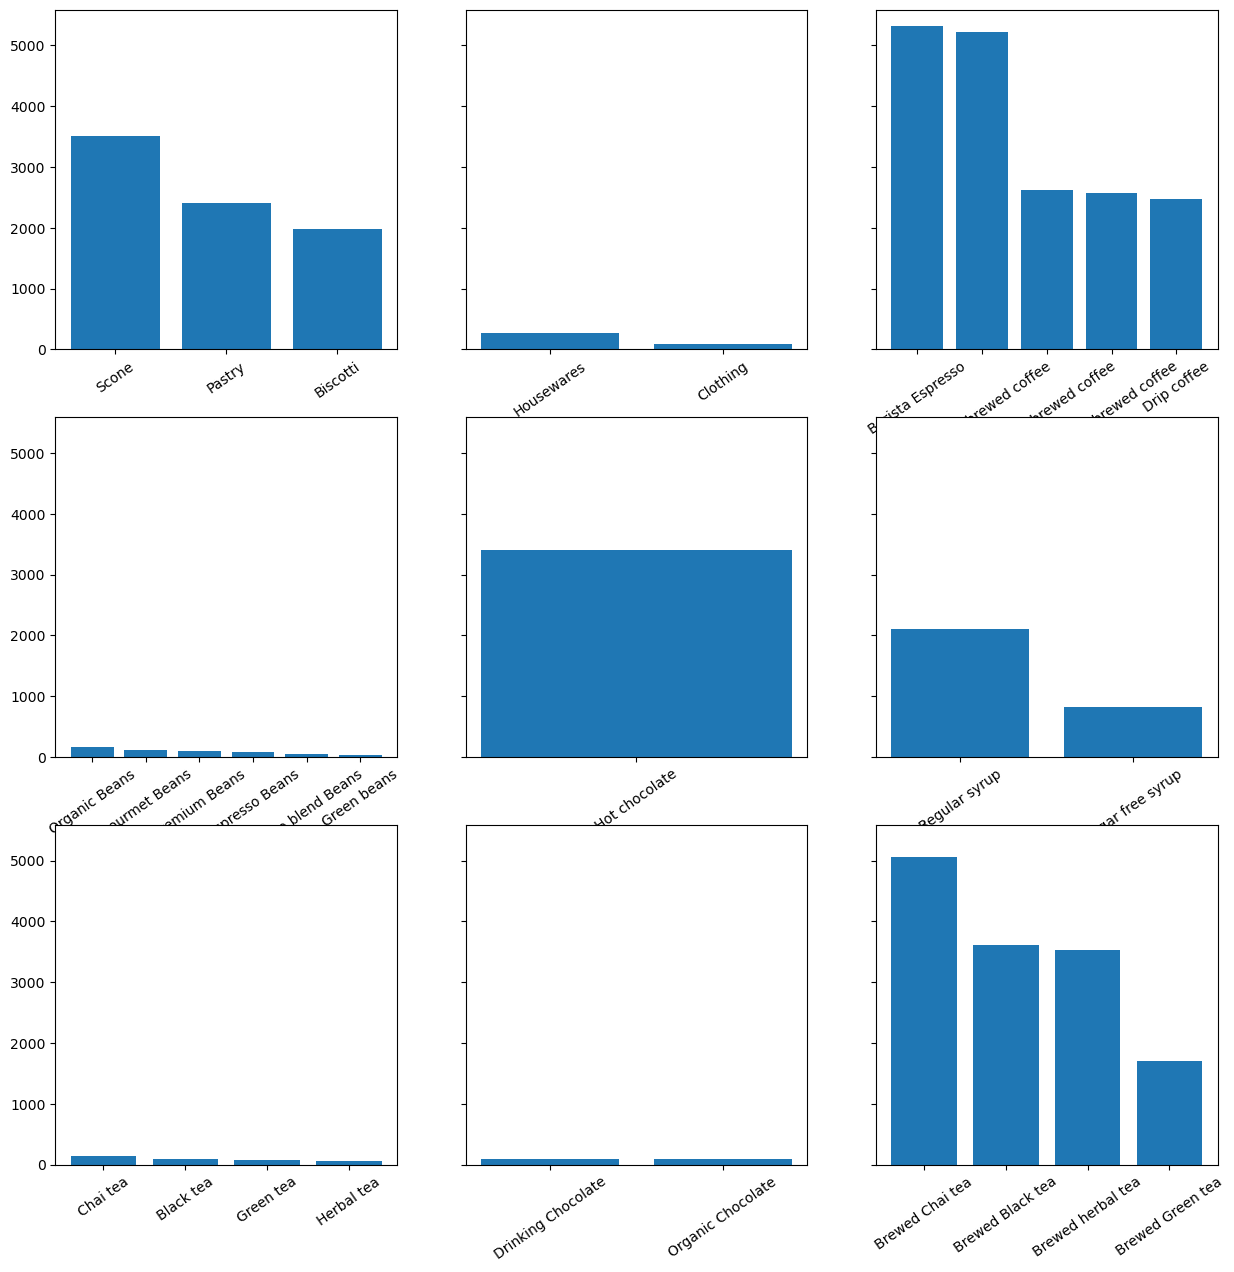

In [33]:
lm = df[df.store_location == 'Lower Manhattan']

grouped = lm.groupby('product_category')['product_type'].value_counts()
print(grouped)
categories = grouped.unstack().index.tolist()

n = len(categories)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharey=True)

axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, item in enumerate(categories):
    # grouped[item].plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].bar(grouped[item].index, grouped[item].values)
    # axes[i].set_title(item)
    # axes[i].set_xlabel('Product Type')
    # axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=35)



In [34]:
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

product_category    product_type         
Bakery              Scone                    3462
                    Pastry                   2300
                    Biscotti                 1855
Branded             Housewares                 95
                    Clothing                   24
Coffee              Barista Espresso         6153
                    Gourmet brewed coffee    5642
                    Organic brewed coffee    2998
                    Drip coffee              2884
                    Premium brewed coffee    2510
Coffee beans        Organic Beans             162
                    Premium Beans             147
                    Espresso Beans            145
                    Gourmet Beans             118
                    House blend Beans          89
                    Green beans                59
Drinking Chocolate  Hot chocolate            3763
Flavours            Regular syrup            1768
                    Sugar free syrup          602
Loose Te

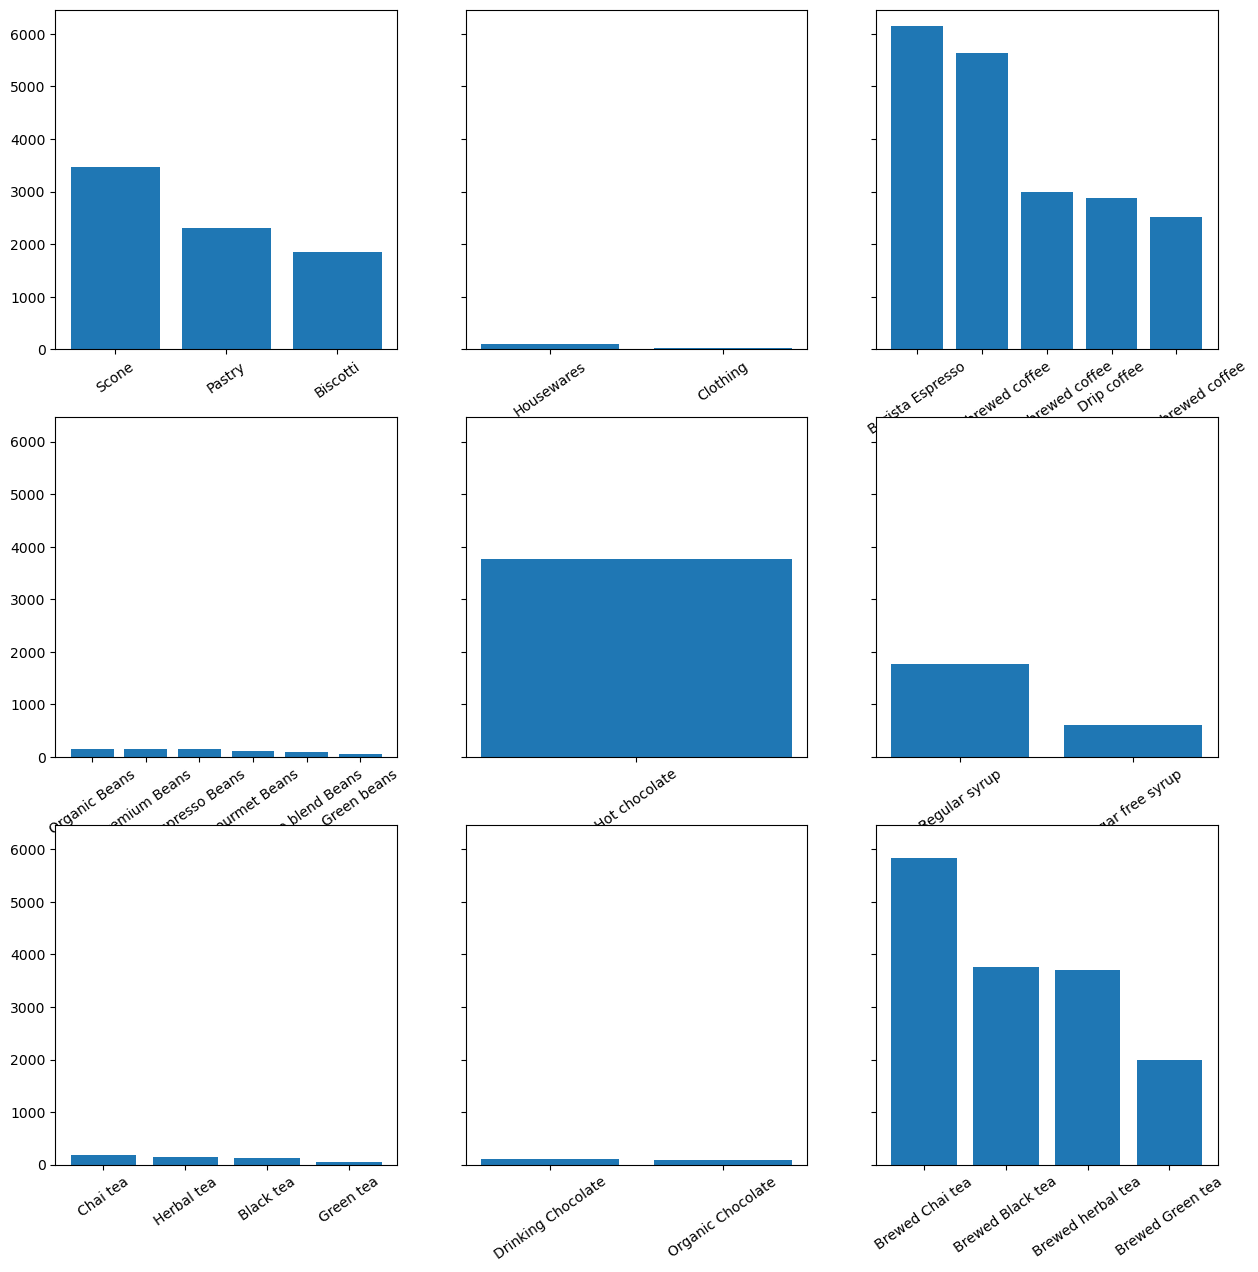

In [35]:
hk = df[df.store_location == "Hell's Kitchen"]

grouped = hk.groupby('product_category')['product_type'].value_counts()
print(grouped)

categories = grouped.unstack().index.tolist()

n = len(categories)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharey=True)

axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, item in enumerate(categories):
    # grouped[item].plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].bar(grouped[item].index, grouped[item].values)
    # axes[i].set_title(item)
    # axes[i].set_xlabel('Product Type')
    # axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=35)



product_category    product_type         
Bakery              Scone                    3205
                    Pastry                   2203
                    Biscotti                 1881
Branded             Housewares                168
                    Clothing                  111
Coffee              Gourmet brewed coffee    6053
                    Barista Espresso         4930
                    Drip coffee              3118
                    Premium brewed coffee    3008
                    Organic brewed coffee    2916
Coffee beans        Gourmet Beans             132
                    Espresso Beans             97
                    Premium Beans              96
                    Organic Beans              91
                    House blend Beans          46
                    Green beans                40
Drinking Chocolate  Hot chocolate            4300
Flavours            Regular syrup            1111
                    Sugar free syrup          379
Loose Te

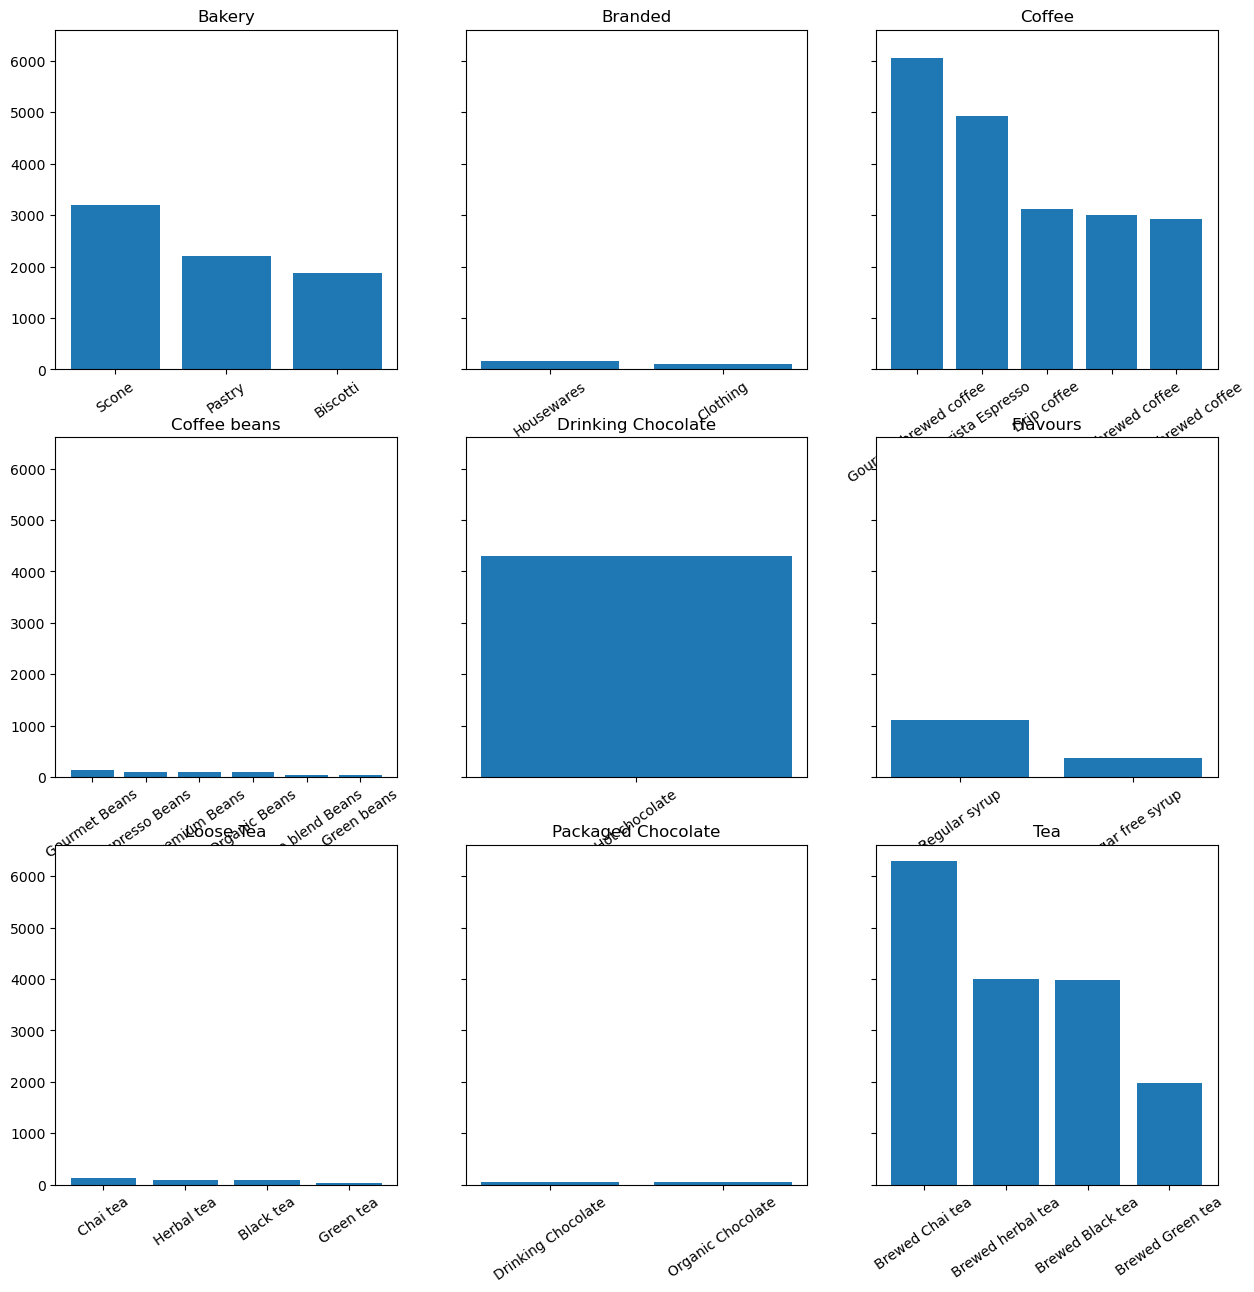

In [36]:
hk = df[df.store_location == "Astoria"]

grouped = hk.groupby('product_category')['product_type'].value_counts()
print(grouped)

categories = grouped.unstack().index.tolist()

n = len(categories)
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 15), sharey=True)

axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, item in enumerate(categories):
    # grouped[item].plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].bar(grouped[item].index, grouped[item].values)
    axes[i].set_title(item)
    # axes[i].set_xlabel('Product Type')
    # axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=35)

### Store-Level Metrics

Module 3: Store Performance

KPIs:
* Total Revenue
* Number of Transactions
* Average Transaction Value
* Average Items Per Transaction

Visualizations:
* Store Rankings (Horizontal Bar chart)
* Insights: Top Performing Store & Low Performing Store
* Growth Trends: Month-on-Month Growth

In [37]:
store_performance = df.groupby('store_location').agg({
    'total_amount': 'sum',
    'transaction_id': 'nunique',
    'transaction_qty': 'sum'
})

store_performance.reset_index()

,store_location,total_amount,transaction_id,transaction_qty
0,Astoria,232243.91,50599,70991
1,Hell's Kitchen,236511.17,50735,71737
2,Lower Manhattan,230057.25,47782,71742


In [38]:
lm = df[df.store_location == 'Lower Manhattan']
hk = df[df.store_location == "Hell's Kitchen"]
astoria = df[df.store_location == "Astoria"]

lm_avg_ticket_size = lm['total_amount'].sum() / lm['transaction_id'].nunique()
hk_avg_ticket_size = hk['total_amount'].sum() / hk['transaction_id'].nunique()
astoria_avg_ticket_size = astoria['total_amount'].sum() / astoria['transaction_id'].nunique()

print(f'Average Ticket Size Lower Manhattan: {lm_avg_ticket_size:.2f}')
print(f'Average Ticket Size Hell\'s Kitchen: {hk_avg_ticket_size:.2f}')
print(f'Average Ticket Size Astoria: {astoria_avg_ticket_size:.2f}')

Average Ticket Size Lower Manhattan: 4.81
Average Ticket Size Hell's Kitchen: 4.66
Average Ticket Size Astoria: 4.59


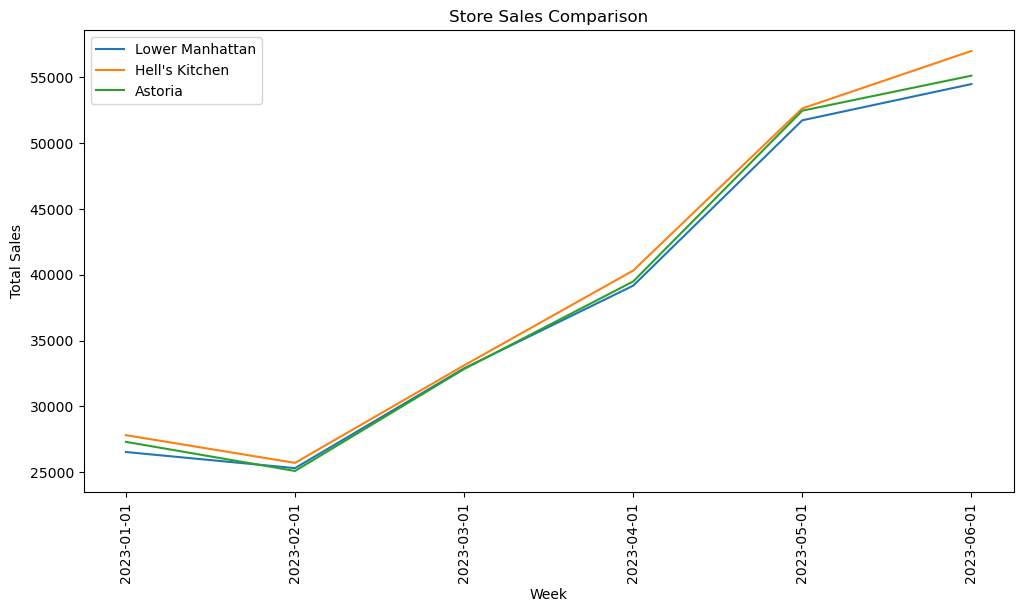

In [39]:
lm_sales = lm.groupby(lm.transaction_date.dt.to_period('M'))['total_amount'].sum()
hk_sales = hk.groupby(hk.transaction_date.dt.to_period('M'))['total_amount'].sum()
astoria_sales = astoria.groupby(astoria.transaction_date.dt.to_period('M'))['total_amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(
    lm_sales.index.start_time.astype(str),
    lm_sales.values
)
plt.plot(
    hk_sales.index.start_time.astype(str),
    hk_sales.values
)
plt.plot(
    astoria_sales.index.start_time.astype(str),
    astoria_sales.values
)
plt.xticks(rotation=90)
plt.legend(['Lower Manhattan', 'Hell\'s Kitchen', 'Astoria'])
plt.title('Store Sales Comparison')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

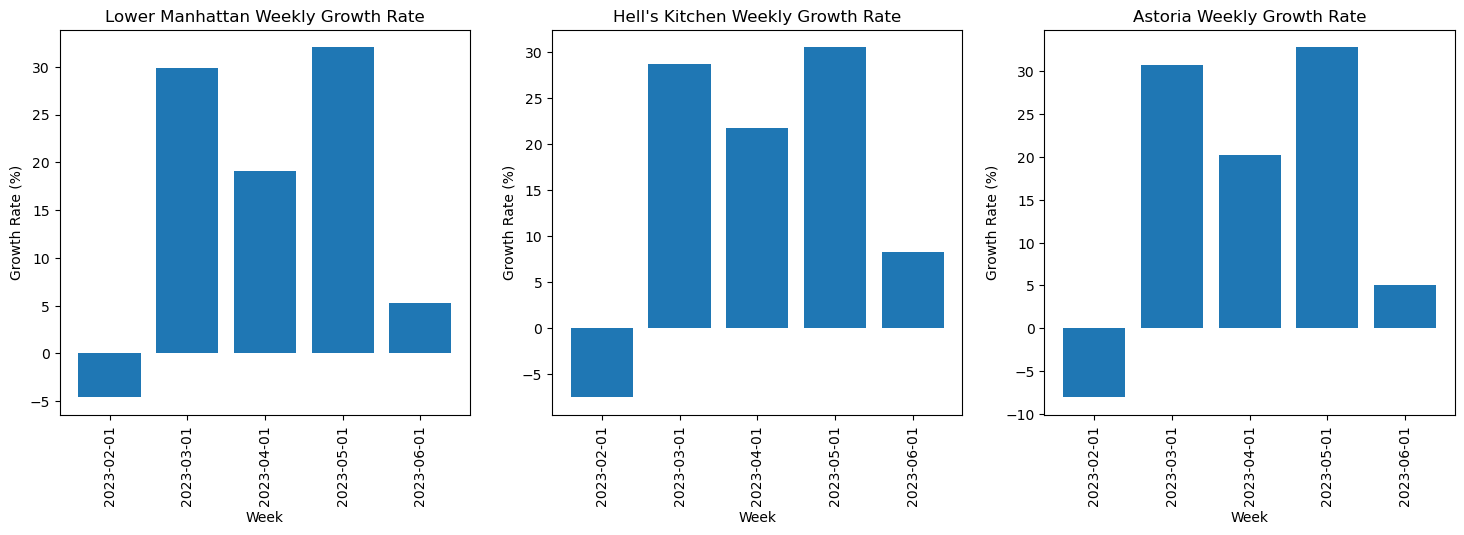

In [40]:
lm_weekly_growth = lm_sales.pct_change() * 100
hk_weekly_growth = hk_sales.pct_change() * 100
astoria_weekly_growth = astoria_sales.pct_change() * 100

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

# Ploting Lower Manhattan weekly growth
axes[0].bar(
    lm_weekly_growth.index.start_time.astype(str),
    lm_weekly_growth.values
)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Lower Manhattan Weekly Growth Rate')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Growth Rate (%)')

# Ploting Hell's Kitchen weekly growth
axes[1].bar(
    hk_weekly_growth.index.start_time.astype(str),
    hk_weekly_growth.values
)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title("Hell's Kitchen Weekly Growth Rate")
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Growth Rate (%)')

# Ploting Astoria weekly growth
axes[2].bar(
    astoria_weekly_growth.index.start_time.astype(str),
    astoria_weekly_growth.values
)
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_title("Astoria Weekly Growth Rate")
axes[2].set_xlabel('Week')
axes[2].set_ylabel('Growth Rate (%)')

plt.show()

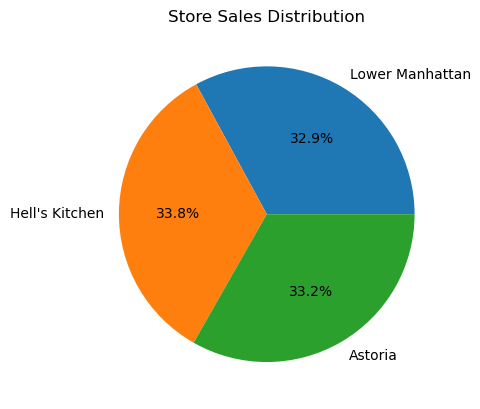

In [41]:
plt.pie(
    [lm_sales.sum(), hk_sales.sum(), astoria_sales.sum()],
    labels=['Lower Manhattan', 'Hell\'s Kitchen', 'Astoria'],
    autopct='%1.1f%%'
)
plt.title('Store Sales Distribution')
plt.show()

## 4. Top-Selling Products

Module 4: Top-Selling Products

* Product Category Distribution (by Sales)
* Product Category Distribution (by Sold Quantities)
* Product Category wise Sales Distribution
* Product Category wise Quantities Sold
* Top-Selling Products (by Sales)
* Top-Selling Products (by Sold Quantities)


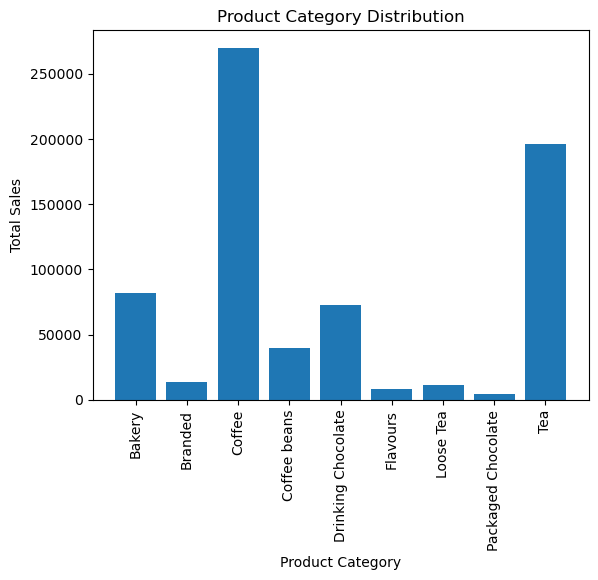

In [42]:
cateogry_distribution = df.groupby('product_category')['total_amount'].sum()

plt.bar(
    cateogry_distribution.index.astype(str),
    cateogry_distribution.values
)
plt.xticks(rotation=90)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

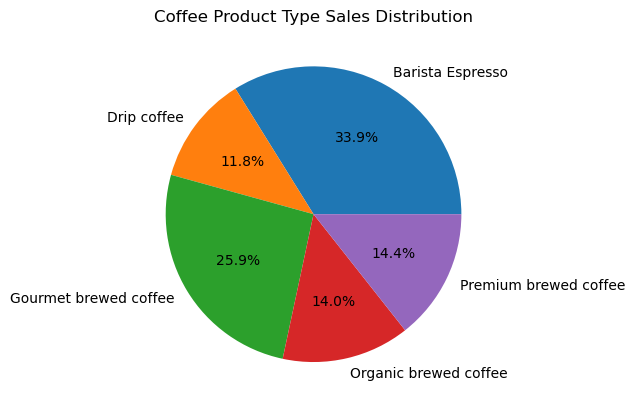

In [43]:
# category level breakdown
grouped = df.groupby(['product_category', 'product_type'])['total_amount'].sum()

plt.pie(
    grouped['Coffee'].values,
    labels=grouped['Coffee'].index.astype(str).tolist(),
    autopct='%1.1f%%'
)

plt.title('Coffee Product Type Sales Distribution')
plt.show()

In [44]:
df.groupby('product_type')['total_amount'].sum().sort_values(ascending=False).head().reset_index(name='Total Sales')

,product_type,Total Sales
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00


In [45]:
df.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False).head().reset_index(name='Total Quantities Sold')

,product_type,Total Quantities Sold
0,Brewed Chai tea,26250
1,Gourmet brewed coffee,25973
2,Barista Espresso,24943
3,Brewed Black tea,17462
4,Hot chocolate,17457
